# Natural Language Processing: Week 4 - Sequence models and literature

앞서 배운 Sequence Model을 이용하여 새로운 text를 생성하는 것을 생각해보자.

이는 굉장히 어렵고 새로운 것처럼 보이지만, 사실 이에 필요한 모든 것을 우리는 이미 배웠다.

새로운 것을 생성하는 것이 아니라, '다음에 올 단어를 예측'하는 예측 문제라고 생각해보자. 전체 phrase로부터 단어들을 추출해 dataset을 형성한 후 X라는 만들어진 phrase와 그 뒤에 올 Y를 예측해나가면 된다.

많은 단어들을 이용하여 신경망을 학습시킨다면 꽤나 복잡한 문장 또한 생성할 수 있을 것이다.

## Lab01

### Import packages

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

### Tokenizer and data


In [2]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \nBattered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [3]:
print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [6]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [8]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(LSTM(20))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 7s 8ms/step - loss: 5.5691 - accuracy: 0.0265
Epoch 2/500
15/15 [==============================] - 0s 7ms/step - loss: 5.5483 - accuracy: 0.0508
Epoch 3/500
15/15 [==============================] - 0s 7ms/step - loss: 5.4983 - accuracy: 0.0508
Epoch 4/500
15/15 [==============================] - 0s 7ms/step - loss: 5.3644 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 0s 7ms/step - loss: 5.2218 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 8ms/step - loss: 5.1374 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0927 - accuracy: 0.0508
Epoch 8/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0646 - accuracy: 0.0508
Epoch 9/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0437 - accuracy: 0.0508
Epoch 10/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0250 - accuracy: 0.0596
Epoch 11/

### Visualize

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

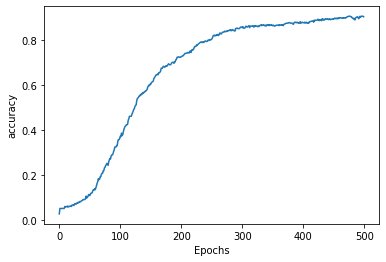

In [10]:
plot_graphs(history, 'accuracy')

### Generate new text

In [11]:
seed_text = "Laurence went to dublin"
next_words = 10

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  # in TF 2.5.x
  # predicted = model.predict_classes(token_list, verbose=0) 

  # in TF 2.6 above
  predict_x = model.predict(token_list, verbose=0)
  predicted=np.argmax(predict_x,axis=1)

  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

Laurence went to dublin the girls and groups a whirligig them new same satisfaction


## Finding what the next word should be

앞선 실습에서, 우리는 단일 가사가 포함된 문자열 데이터를 통해 새 텍스트를 생성하기 위해 데이터를 준비하는 방법에 대해 알아봤다. 

우리는 데이터를 토큰화하고 문장의 다음 단어로 표시된 하위 문장 조각들을 만들고, 라벨을 원핫 인코딩하여 신경망을 구축할 수 있도록 했다. 

이로 인해 생성된 문장을 살펴보면, 상당히 많은 단어가 중복적으로 나타남을 알 수 있는데, 이는 LSTM이 context를 단순히 forward 방향으로만 이동시키기 때문이라고 할 수 있다.

LSTM 부분에 Bidirectional을 추가하면 조금 더 자연스러운 문장을 얻을 수 있다

In [12]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 4s 10ms/step - loss: 5.5667 - accuracy: 0.0110
Epoch 2/500
15/15 [==============================] - 0s 10ms/step - loss: 5.5379 - accuracy: 0.0464
Epoch 3/500
15/15 [==============================] - 0s 10ms/step - loss: 5.4712 - accuracy: 0.0486
Epoch 4/500
15/15 [==============================] - 0s 10ms/step - loss: 5.2844 - accuracy: 0.0486
Epoch 5/500
15/15 [==============================] - 0s 11ms/step - loss: 5.1319 - accuracy: 0.0486
Epoch 6/500
15/15 [==============================] - 0s 10ms/step - loss: 5.0615 - accuracy: 0.0486
Epoch 7/500
15/15 [==============================] - 0s 10ms/step - loss: 5.0240 - accuracy: 0.0508
Epoch 8/500
15/15 [==============================] - 0s 10ms/step - loss: 4.9928 - accuracy: 0.0530
Epoch 9/500
15/15 [==============================] - 0s 10ms/step - loss: 4.9630 - accuracy: 0.0574
Epoch 10/500
15/15 [==============================] - 0s 11ms/step - loss: 4.9308 - accuracy: 0.0486

In [13]:
seed_text = "Laurence went to dublin"
next_words = 10

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predict_x = model.predict(token_list, verbose=0)
  predicted=np.argmax(predict_x,axis=1)

  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

Laurence went to dublin didnt forget him all at hall up me me me


이전보다 훨씬 나은 문장이 생성되었음을 확인할 수 있다.

여전히 반복이 있고 어색한 부분이 있지만, 이는 우리가 데이터로써 넣어준 문장이 곡 가사이기 때문이라 할 수도 있다.

또한, 문장 생성은 뒤로 갈 수록, 생성된 데이터에 대한 새로운 예측이기 때문에 문장이 길어질 수록 정확도가 떨어지는 문제도 있다.

위 코드에서, 사용된 데이터를 바꾸어 더 나은 문장을 생성할 수 있도록 해보자.

## Lab02

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
tokenizer = Tokenizer()
path = '/content/drive/MyDrive/data'
data = open(f'{path}/Laurences_generated_poetry.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [16]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [21]:
# large corpus에 대해 더 잘 동작할 수 있도록 model 수정
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150))) # increase units
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate = 0.01) # use own optimizer
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
377/377 [==============================] - 10s 18ms/step - loss: 6.6324 - accuracy: 0.0758
Epoch 2/500
377/377 [==============================] - 7s 18ms/step - loss: 5.7684 - accuracy: 0.1118
Epoch 3/500
377/377 [==============================] - 7s 18ms/step - loss: 4.8811 - accuracy: 0.1622
Epoch 4/500
377/377 [==============================] - 7s 18ms/step - loss: 3.9639 - accuracy: 0.2336
Epoch 5/500
377/377 [==============================] - 7s 18ms/step - loss: 3.2044 - accuracy: 0.3218
Epoch 6/500
377/377 [==============================] - 7s 18ms/step - loss: 2.4641 - accuracy: 0.4419
Epoch 7/500
377/377 [==============================] - 7s 18ms/step - loss: 1.9608 - accuracy: 0.5424
Epoch 8/500
377/377 [==============================] - 7s 18ms/step - loss: 1.5932 - accuracy: 0.6193
Epoch 9/500
377/377 [==============================] - 7s 18ms/step - loss: 1.3172 - accuracy: 0.6855
Epoch 10/500
377/377 [==============================] - 7s 17ms/step - loss: 1.20

### Visualize

In [22]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

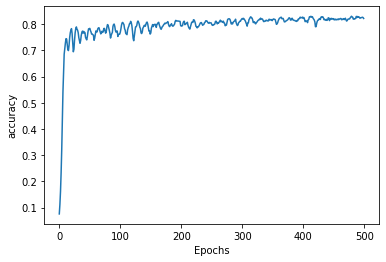

In [23]:
plot_graphs(history, 'accuracy')

In [27]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predict_x = model.predict(token_list, verbose=0)
  predicted=np.argmax(predict_x,axis=1)

  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this little silver again falls find you the fields of athenry the own then she love love their journey would young and gone by and then i will always maintain love broad did did say moment saw she water neer fair city from the pretty young fair maid sing before the wings to fly with our bow on the mountain valley i beg said and gone and i always feel no pain faces on the quay just as a writin a pair of him smiling bride of love on his flute sat the cold winds of night you will go me
